In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True, vertical_flip=False)
test_datagen= ImageDataGenerator(rescale=1./255)

In [ ]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/dataset project/TRAIN_SET",target_size=(64,64),class_mode='categorical')

Found 2626 images belonging to 5 classes.


In [ ]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/dataset project/TEST_SET",target_size=(64,64),class_mode='categorical')

Found 1055 images belonging to 5 classes.


In [ ]:
x_train.class_indices

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten
model = Sequential()
model.add(Convolution2D(32, (3,3), input_shape=(64,64,3),activation = 'relu')) #Feature map
model.add(MaxPooling2D(pool_size = (2,2))) #Pooled matrix
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
len(x_train)

83

In [ ]:
len(x_test)

33

In [ ]:
model.fit_generator(x_train, steps_per_epoch=len(x_train), validation_data=x_test, validation_steps=len(x_test),epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


83/83 [==============================] - 1020s 12s/step - loss: 0.1905 - accuracy: 0.9337 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 2/10
83/83 [==============================] - 23s 270ms/step - loss: 0.0026 - accuracy: 0.9996 - val_loss: 0.0500 - val_accuracy: 0.9773
Epoch 3/10
83/83 [==============================] - 25s 303ms/step - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.0232 - val_accuracy: 0.9934
Epoch 4/10
83/83 [==============================] - 23s 280ms/step - loss: 4.9200e-04 - accuracy: 1.0000 - val_loss: 0.0600 - val_accuracy: 0.9735
Epoch 5/10
83/83 [==============================] - 24s 292ms/step - loss: 1.2082e-04 - accuracy: 1.0000 - val_loss: 0.0830 - val_accuracy: 0.9630
Epoch 6/10
83/83 [==============================] - 23s 271ms/step - loss: 6.9097e-05 - accuracy: 1.0000 - val_loss: 0.0885 - val_accuracy: 0.9621
Epoch 7/10
83/83 [==============================] - 24s 290ms/step - loss: 4.2475e-05 - accuracy: 1.0000 - val_loss: 0.0878 - val_accuracy: 0

In [ ]:
model.save('fruits.h5')

In [ ]:
ls

drive/  fruits.h5  sample_data/


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('fruits.h5')

In [ ]:
pwd

'/content'

In [ ]:
img=image.load_img(r'/content/drive/MyDrive/dataset project/TEST_SET/WATERMELON/129_100.jpg')

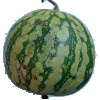

In [ ]:
img

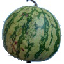

In [ ]:
img=image.load_img(r'/content/drive/MyDrive/dataset project/TEST_SET/WATERMELON/129_100.jpg',target_size=(64,64))
img

In [ ]:
x=image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
x.shape

(64, 64, 3)

In [ ]:
x= np.expand_dims(x,axis=0)
x

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [ ]:
x.shape

(1, 64, 64, 3)

In [ ]:
y= np.argmax(model.predict(x),axis=1)
y

1/1 [==============================] - 0s 111ms/step


array([4])

In [ ]:
x_train.class_indices

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}

In [ ]:
index=['APPLES','BANANA','ORANGE','PINEAPPLE','WATERMELON']

In [ ]:
index[y[0]]

'WATERMELON'

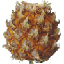

In [ ]:
img=image.load_img(r'/content/drive/MyDrive/dataset project/TEST_SET/PINEAPPLE/123_100.jpg',target_size=(64,64))
img

In [ ]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
y

1/1 [==============================] - 0s 31ms/step


array([3])

In [ ]:
index=['APPLES','BANANA','ORANGE','PINEAPPLE','WATERMELON']
index[y[0]]

'PINEAPPLE'